### HFTS: Analysis

#### D'Amico and Wickman, 2025

In [13]:
# Helpful packages
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import data
weekly = pd.read_csv('../data/clean/weekly_data_2024.csv', index_col='date', parse_dates=True)
monthly = pd.read_csv('../data/clean/monthly_data_2024.csv', index_col='date', parse_dates=True)

# Look at the monthly data
monthly['log_ip'] = monthly['ip'].apply(lambda x: np.log(x) if x > 0 else None)
monthly['log_cpi'] = monthly['cpi'].apply(lambda x: np.log(x) if x > 0 else None)
display(monthly)

,select_soma,treasuries,agency_mbs,bonds,tbills,tips,floating_rate_notes,ip,cpi,oil,...,index,equipment_inf,food_inf,health_inf,recreation_inf,transportation_inf,LSAP,lumber_prod_adj,log_ip,log_cpi
date,,,,,,,,,,,,,,,,,,,,,
2008-07-16,0.473303,0.434132,0.000000,0.412392,0.021740,0.039171,0.000000,99.8651,217.463,4495.20,...,99.987821,100.538750,100.324607,100.153679,100.404571,100.002250,0.00000,-15.100609,4.603820,5.382029
2008-08-16,0.473303,0.433471,0.000000,0.411731,0.021740,0.039832,0.000000,99.4214,219.016,4369.00,...,100.175161,100.803355,100.629806,100.442355,100.494516,98.445774,-0.75180,-14.031182,4.599367,5.389145
2008-09-15,0.472473,0.432642,0.000000,0.411731,0.020911,0.039832,0.000000,97.8448,218.690,3864.50,...,100.234767,100.985000,100.734467,100.647967,100.574500,97.873167,0.01250,-15.816939,4.583383,5.387655
2008-10-16,0.469985,0.429569,0.000000,0.411147,0.018423,0.040416,0.000000,93.5590,218.877,4237.40,...,99.045387,101.286935,101.114742,101.053419,100.717065,93.765677,0.41045,-16.861391,4.538592,5.388510
2008-11-15,0.469985,0.428914,0.000000,0.410491,0.018423,0.041071,0.000000,94.4956,216.995,4378.00,...,98.382633,101.292267,100.903767,101.260333,100.812233,83.890467,0.00000,-13.598506,4.548553,5.379874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,7.346681,4.496673,2.484628,4.228603,0.250306,0.365380,0.017764,103.1141,306.187,4979.25,...,132.958333,107.815433,157.346700,157.168133,112.877733,116.857967,0.00000,3.002542,4.635836,5.724196
2023-10-16,7.276557,4.443982,2.467195,4.190705,0.235507,0.365380,0.017770,103.2974,307.288,4848.25,...,133.003968,107.905000,157.861968,157.513419,112.968839,115.907613,0.00000,14.969917,4.637612,5.727785
2023-11-15,7.192139,4.375947,2.450792,4.133018,0.231266,0.365400,0.011663,102.5683,307.531,4808.40,...,132.696833,107.458633,157.873167,158.079300,112.389600,113.871967,0.00000,9.340160,4.630529,5.728576


#### (1) Estimate Vector Autoregression (VAR) Model

In [12]:
## Monthly VaR with log(IP), log(CPI), volume of US Treasury Notes & Bonds in SOMA portfolio, and the 1-yr government yield
# Prepare data
var_data = monthly[['log_ip', 'log_cpi', 'bonds', 'fcm1']].dropna()
var_data = var_data.rename(columns={
    'log_ip': 'real_activity',
    'log_cpi': 'inflation',
    'bonds': 'soma_holdings'
})
display(var_data)

,real_activity,inflation,soma_holdings,fcm1
date,,,,
2008-07-16,4.603820,5.382029,0.412392,2.2850
2008-08-16,4.599367,5.389145,0.411731,2.2000
2008-09-15,4.583383,5.387655,0.411731,1.9425
2008-10-16,4.538592,5.388510,0.411147,1.4360
2008-11-15,4.548553,5.379874,0.410491,1.0625
...,...,...,...,...
2023-09-15,4.635836,5.724196,4.228603,5.4300
2023-10-16,4.637612,5.727785,4.190705,5.4225
2023-11-15,4.630529,5.728576,4.133018,5.3150


In [18]:
# Estimate VAR model
var_model1 = VAR(var_data)
var_results1 = var_model1.fit(maxlags=12, ic='aic')

# Number of lags chosen by AIC
selected_lags = var_results1.k_ar
print(f"Lags selected by AIC: {selected_lags}")

# Notes
# 1. Analyze which lags, variables significant for each equation
# 2. Off-diagonal elements of the covariance matrix should be close to zero less VAR may be inadequately specified
print(var_results1.summary())

Lags selected by AIC: 4
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Aug, 2025
Time:                     13:55:17
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.6125
Nobs:                     183.000    HQIC:                  -31.3217
Log likelihood:           1939.50    FPE:                1.54227e-14
AIC:                     -31.8051    Det(Omega_mle):     1.08105e-14
--------------------------------------------------------------------
Results for equation real_activity
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.018258         0.201371            0.091           0.928
L1.real_activity         0.948862         0.067150           14.131           0.000
L1.inflation    

#### (2) Apply Cholesky decomposition to recover structural shocks

Cholesky Decomposition Matrix:
 [[ 7.01230066e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.72664041e-05  2.38430683e-03  0.00000000e+00  0.00000000e+00]
 [-1.16009362e-02 -9.37810163e-04  5.10089437e-02  0.00000000e+00]
 [-1.42982242e-02  2.67018701e-02  8.43195671e-03  1.21914041e-01]]


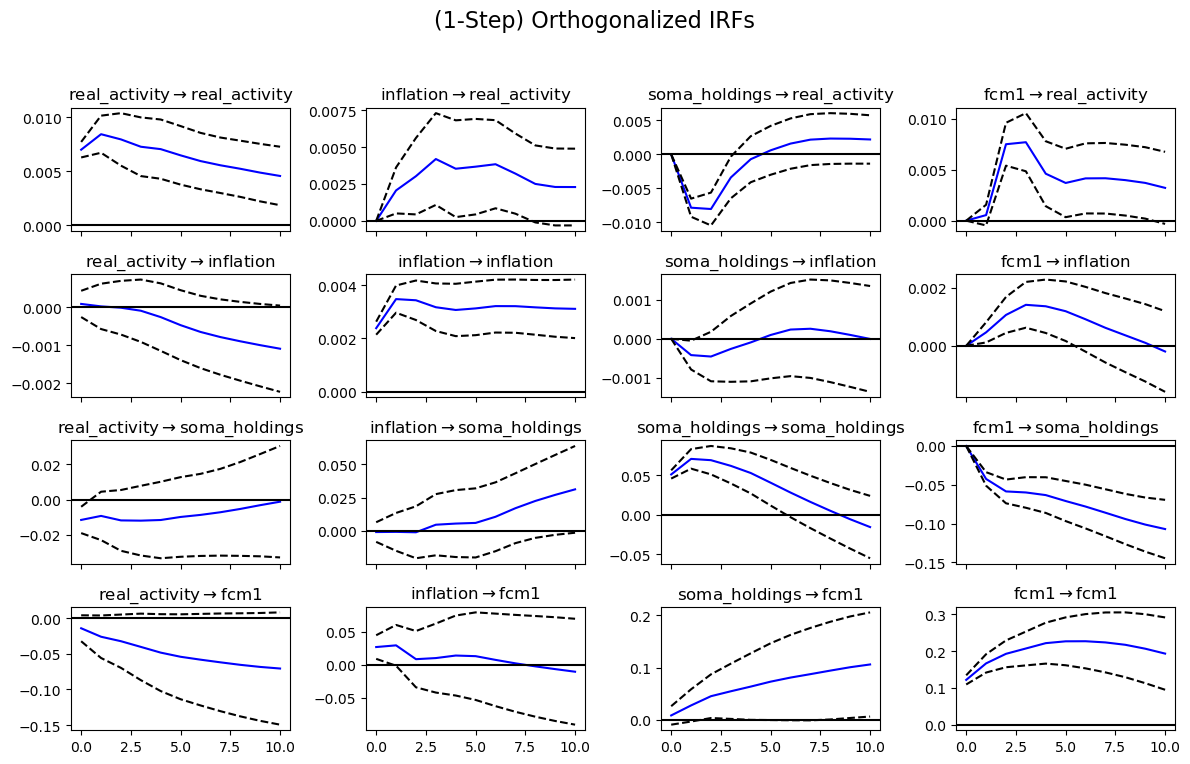

In [19]:
# Extract estimated residual covariance matrix
cov_matrix = var_results1.sigma_u

# Perform Cholesky decomposition
cholesky_matrix = np.linalg.cholesky(cov_matrix)
print("Cholesky Decomposition Matrix:\n", cholesky_matrix)

# Plot orthogolalized impulse response functions (IRFs)
irf1 = var_results1.irf(10)
irf1.plot(orth=True, figsize=(12, 8))
plt.suptitle('(1-Step) Orthogonalized IRFs', fontsize=16)
plt.tight_layout(rect=[0.0001, 0.03, 1.0, 0.95])
plt.show()

#### (3) Use Jorda (2005) local projection method to estimate impulse response functions (IRFs)

Analyze response of various yields to shocks to real activity, inflation, unemployment, and SOMA holdings.